In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# leer las trayectorias generadas
import h5py

data_file = "trayectorias.h5"

with h5py.File(data_file, "r") as hf:
    trayectorias = hf["trayectorias"][:]

# Asegúrate de que las trayectorias se ajusten a tus necesidades específicas
# Si es necesario, puedes transformar los datos en tensores TensorFlow
trayectorias = tf.constant(trayectorias, dtype=tf.float32)
trayectorias

<tf.Tensor: shape=(300, 2, 300), dtype=float32, numpy=
array([[[-2.7704487e+00, -2.3333149e+00, -1.9741178e+00, ...,
          5.8512789e-01,  8.8289982e-01,  1.1692171e+00],
        [ 3.7635925e+00,  2.8928177e+00,  2.5343447e+00, ...,
          2.2337341e+00,  2.2019653e+00,  2.0568748e+00]],

       [[ 2.1901448e+00,  2.5680997e+00,  2.7923000e+00, ...,
          1.9981149e+00,  1.9574738e+00,  1.8920397e+00],
        [ 3.4284711e+00,  2.2254207e+00,  1.1710891e+00, ...,
         -1.9840167e-01, -4.0210575e-01, -5.7039696e-01]],

       [[-3.8880987e+00, -4.0348639e+00, -4.0429554e+00, ...,
         -3.7252225e-03, -2.8669640e-01, -5.8195120e-01],
        [-2.0245302e+00, -4.1348273e-01,  1.9013317e-01, ...,
         -2.0524542e+00, -2.1706202e+00, -2.2313769e+00]],

       ...,

       [[-2.4252544e-01,  2.5390339e-01,  7.7605003e-01, ...,
          1.9410220e+00,  1.9946553e+00,  2.0063164e+00],
        [ 3.5837822e+00,  3.8284609e+00,  3.9442217e+00, ...,
          5.7530445e-01,

In [3]:
# n_particula, (posicion,velocidad), tiempo
trayectorias.shape
#TensorShape([300,2,300])

TensorShape([300, 2, 300])

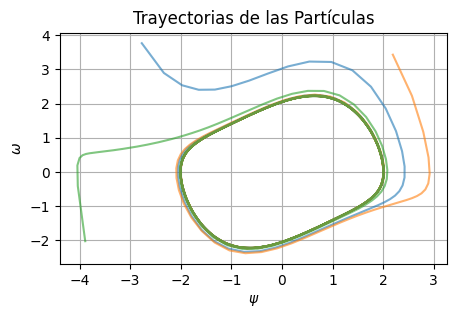

In [4]:
def plot_trayectoria(trayectorias, N):
    plt.figure(figsize=(5, 3))
    if len(trayectorias.shape) == 2:
        print('one data point')
        plt.plot(trayectorias[0], trayectorias[1], alpha=0.6)

    else:
        for i in range(N):
            plt.plot(trayectorias[i][0], trayectorias[i][1], alpha=0.6)
    plt.xlabel(r'$\psi$')
    plt.ylabel(r'$\omega$')
    plt.title('Trayectorias de las Partículas')
    plt.grid()
    plt.show()

plot_trayectoria(trayectorias, 3)

In [5]:
trayectorias

<tf.Tensor: shape=(300, 2, 300), dtype=float32, numpy=
array([[[-2.7704487e+00, -2.3333149e+00, -1.9741178e+00, ...,
          5.8512789e-01,  8.8289982e-01,  1.1692171e+00],
        [ 3.7635925e+00,  2.8928177e+00,  2.5343447e+00, ...,
          2.2337341e+00,  2.2019653e+00,  2.0568748e+00]],

       [[ 2.1901448e+00,  2.5680997e+00,  2.7923000e+00, ...,
          1.9981149e+00,  1.9574738e+00,  1.8920397e+00],
        [ 3.4284711e+00,  2.2254207e+00,  1.1710891e+00, ...,
         -1.9840167e-01, -4.0210575e-01, -5.7039696e-01]],

       [[-3.8880987e+00, -4.0348639e+00, -4.0429554e+00, ...,
         -3.7252225e-03, -2.8669640e-01, -5.8195120e-01],
        [-2.0245302e+00, -4.1348273e-01,  1.9013317e-01, ...,
         -2.0524542e+00, -2.1706202e+00, -2.2313769e+00]],

       ...,

       [[-2.4252544e-01,  2.5390339e-01,  7.7605003e-01, ...,
          1.9410220e+00,  1.9946553e+00,  2.0063164e+00],
        [ 3.5837822e+00,  3.8284609e+00,  3.9442217e+00, ...,
          5.7530445e-01,

# ordenamiento de los datos

In [8]:
# shape: TensorShape([300, 2, 300])
dataset = tf.data.Dataset.from_tensor_slices(trayectorias)

# Determina los tamaños de tus conjuntos de datos
size = tf.data.experimental.cardinality(dataset).numpy()
print("Total de datos: ", size)
train_size = int(0.7 * size)
val_size = int(0.15 * size)
test_size = int(0.15 * size)

# Mezcla tus datos
dataset = dataset.shuffle(size)

# Divide tus datos en conjuntos de entrenamiento, validación y prueba
train_data = dataset.take(train_size)
remaining = dataset.skip(train_size)
val_data = remaining.take(val_size)
test_data = remaining.skip(val_size)

print('\ttraining size: ', len(train_data))
print('\tvalidation size: ', len(val_data))
print('\ttesting size: ', len(test_data))

# Para obtener el primer elemento
# first_data = next(iter(dataset.take(1)))
# second_data = next(iter(dataset.skip(1).take(1)))

# print("Forma de un solo dato: ", first_data.shape)

# Convertir train_data a un tensor
train_data_tensor = tf.concat(list(train_data), axis=0)

# Imprimir la forma del tensor de entrenamiento
print("Forma del tensor de entrenamiento: ", train_data_tensor.shape)

# Imprimir el tensor de entrenamiento
print("Tensor de entrenamiento: ")
print(train_data_tensor)


Total de datos:  300
	training size:  210
	validation size:  45
	testing size:  45
Forma del tensor de entrenamiento:  (420, 300)
Tensor de entrenamiento: 
tf.Tensor(
[[ 4.748439    4.731289    4.6820583  ... -1.7502838  -1.6369256
  -1.5076208 ]
 [ 0.14940214 -0.3012806  -0.410416   ...  0.78426856  0.9077257
   1.0247891 ]
 [-3.5549564  -3.5228214  -3.4636557  ... -1.9374185  -1.993068
  -2.0064623 ]
 ...
 [ 4.609946    4.04044     3.9616778  ...  2.1485536   1.9643291
   1.6711018 ]
 [ 3.5135267   3.63386     3.642946   ...  1.5368305   1.730443
   1.871979  ]
 [ 1.564968    0.3768139  -0.16698323 ...  1.6321298   1.2577678
   0.8584798 ]], shape=(420, 300), dtype=float32)


forma altermativa de ordenar los datos, tener los inputs y outputs separados,
de manera de utilizar:

```
model.fit(
    X_train, Y_train, validation_data=(X_valid, Y_valid), 
)
```

Forma del conjunto de entrenamiento:  (210, 2, 300)
Forma del conjunto de validación:  (45, 2, 300)
Forma del conjunto de prueba:  (45, 2, 300)
Forma de X_train:  (210, 300)
Forma de P_train:  (210, 300)


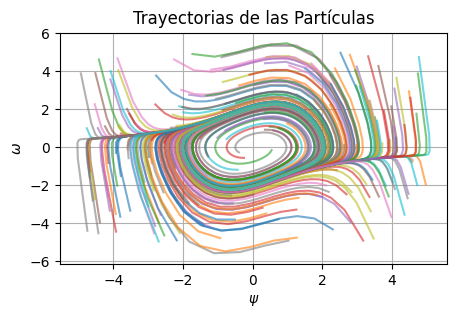

In [25]:
# Separar en train, valid, test
train_data = trayectorias[:210, :, :]
val_data = trayectorias[210:255, :, :]
test_data = trayectorias[255:, :, :]

# Imprimir las formas de los conjuntos de datos
print("Forma del conjunto de entrenamiento: ", train_data.shape)
print("Forma del conjunto de validación: ", val_data.shape)
print("Forma del conjunto de prueba: ", test_data.shape)

# Obtener tensores X_train, P_train, X_valid, P_valid
X_train = train_data[:, 0, :]
P_train = train_data[:, 1, :]
X_valid = val_data[:, 0, :]
P_valid = val_data[:, 1, :]
X_test = test_data[:, 0, :]
P_test = test_data[:, 1, :]

# Imprimir las formas de los tensores
print("Forma de X_train: ", X_train.shape)
print("Forma de P_train: ", P_train.shape)

plot_trayectoria(train_data, 210)

# El modelo

Debido a que este modelo utiliza condiciones iniciales y no las toma como input, significa que el modelo habrá de aprender estas condiciones iniciales,
por tanto solo puede aprender de una curva a la vez


In [151]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, metrics

class VanderPolModel(tf.keras.Model):
    """Modelo de vanderPol, toma la input de tiempo"""
    def __init__(self, activation="tanh",**kwargs):
        super().__init__(**kwargs)

        self.hidden1 = layers.Dense(64, activation=activation)
        self.hidden2 = layers.Dense(64, activation=activation)
        self.hidden3 = layers.Dense(64, activation=activation)
        self.hidden4 = layers.Dense(64, activation=activation)
        self.position = layers.Dense(1, activation=activation)

    def call(self, inputs):
        inputs_expanded = tf.expand_dims(inputs, axis=-1) 
        z = self.hidden1(inputs_expanded)
        z = self.hidden2(z)
        z = self.hidden3(z)
        z = self.hidden4(z)
        x = self.position(z)
        return x

In [152]:
t = tf.range(300, dtype=tf.float32)

In [174]:
@tf.function
def physics_loss(y_true, y_pred, model, inputs, X_target, P_target, params):
    mu = params.get('mu', 2.0)
    position_weight = params.get('position_weight', 10)
    momentum_weight = params.get('momentum_weight', 5)
    data_weight = params.get('data_weight', 1)
    phys_weight = params.get('phys_weight', 1)

    inputs = tf.expand_dims(inputs, axis=-1)

    with tf.GradientTape(persistent=True) as tape:
        tape.watch(inputs)
        X_predicted = model(inputs)
        dx_dt = tape.gradient(X_predicted, inputs)
        d2x_dt2 = tape.gradient(dx_dt, inputs)

    f = d2x_dt2 - mu * (1 - tf.square(X_predicted)) * dx_dt + X_predicted
    
    # Physics loss
    position_loss = tf.reduce_mean(tf.square(X_target[0] - X_predicted[0]))
    momentum_loss = tf.reduce_mean(tf.square(P_target[0] - dx_dt[0]))
    
    loss = phys_weight * tf.reduce_mean(tf.square(f))
    loss += position_weight * position_loss
    loss += momentum_weight * momentum_loss
    
    # Data loss (optional, depending on your needs)
    # data_loss = data_weight * tf.reduce_mean(tf.square(y_true - y_pred))
    # loss += data_loss
    
    return loss


In [177]:
def train(model, inputs, targets, params, optimizer, epochs=100, batch_size=32):
    # Compile the model with the partial physics loss function
    X_target = targets[0]
    P_target = targets[1]

    partial_physics_loss = functools.partial(physics_loss, model=model, 
        X_target=X_target, P_target=P_target, params=params)
    model.compile(optimizer=optimizer, loss=partial_physics_loss)

    # Train the model
    history = model.fit(inputs, X_target, epochs=epochs, batch_size=batch_size)

    return history


In [178]:
params = {'mu': 2.0, 'position_weight': 10, 'momentum_weight': 5, 'phys_weight': 1}
model = VanderPolModel()
inputs = t
history = train(model, inputs, [X_train[0], P_train[0]], params, optimizer)


Epoch 1/100


TypeError: in user code:

    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: Binding inputs to tf.function failed due to `missing a required argument: 'inputs'`. Received args: (<tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'vander_pol_model_78/dense_394/Tanh:0' shape=(None, 1) dtype=float32>) and kwargs: {'model': <__main__.VanderPolModel object at 0x000001F7097A3CA0>, 'X_target': <tf.Tensor: shape=(300,), dtype=float32, numpy=
    array([-2.7704487 , -2.333315  , -1.9741178 , -1.6457042 , -1.3252585 ,
           -0.9974012 , -0.6523223 , -0.28156874,  0.11775603,  0.5410706 ,
            0.97486705,  1.3909764 ,  1.758675  ,  2.049841  ,  2.2531753 ,
            2.37298   ,  2.4227643 ,  2.4215727 ,  2.3834667 ,  2.3190174 ,
            2.2347887 ,  2.1351202 ,  2.022507  ,  1.8980992 ,  1.7623115 ,
            1.6149337 ,  1.4550943 ,  1.2815325 ,  1.0927597 ,  0.88706034,
            0.6624959 ,  0.41742912,  0.1506339 , -0.1367691 , -0.4405502 ,
           -0.7533284 , -1.061027  , -1.3467019 , -1.5952243 , -1.7934394 ,
           -1.9348379 , -2.0216396 , -2.0591187 , -2.055215  , -2.0190506 ,
           -1.9567219 , -1.8728032 , -1.7707536 , -1.6527003 , -1.519527  ,
           -1.3714186 , -1.2079073 , -1.0282651 , -0.8310163 , -0.614007  ,
           -0.37626258, -0.11802717,  0.15923616,  0.45253673,  0.75338125,
            1.0487001 ,  1.3237265 ,  1.562438  ,  1.7529042 ,  1.8899735 ,
            1.9738481 ,  2.0101044 ,  2.0072656 ,  1.9723305 ,  1.911208  ,
            1.8286974 ,  1.7278335 ,  1.6104052 ,  1.4773788 ,  1.3289089 ,
            1.1648432 ,  0.9838559 ,  0.7844301 ,  0.5655047 ,  0.32647476,
            0.06719128, -0.21139129, -0.5041882 , -0.802284  , -1.09294   ,
           -1.3604699 , -1.5896224 , -1.7700875 , -1.8974193 , -1.9732844 ,
           -2.004279  , -1.9973407 , -1.9592266 , -1.8960851 , -1.8118407 ,
           -1.7091371 , -1.5897429 , -1.4545531 , -1.3039383 , -1.1372749 ,
           -0.9534764 , -0.7514429 , -0.53006107, -0.28820944, -0.02573182,
            0.25525415,  0.54925627,  0.8468879 ,  1.1350061 ,  1.397193  ,
            1.6194936 ,  1.7928557 ,  1.9130675 ,  1.9826392 ,  2.0081768 ,
            1.9965017 ,  1.95454   ,  1.888189  ,  1.8010828 ,  1.6958134 ,
            1.5740699 ,  1.4367187 ,  1.2839388 ,  1.1149684 ,  0.92883015,
            0.72440016,  0.50040823,  0.2557106 , -0.00948568, -0.29272738,
           -0.5878953 , -0.8851243 , -1.1708276 , -1.4287477 , -1.644977  ,
           -1.811093  , -1.9243053 , -1.9873363 , -2.0071626 , -1.9910104 ,
           -1.9453845 , -1.8759837 , -1.7866154 , -1.6794676 , -1.555924  ,
           -1.4165847 , -1.2612798 , -1.0898408 , -0.9009474 , -0.6930874 ,
           -0.46530604, -0.21720666,  0.05102518,  0.33691034,  0.6335834 ,
            0.9304713 ,  1.2133412 ,  1.4660693 ,  1.6751586 ,  1.8328197 ,
            1.9372691 ,  1.992551  ,  2.0059626 ,  1.9845252 ,  1.9346825 ,
            1.8618915 ,  1.769424  ,  1.6593988 ,  1.5331213 ,  1.3910828 ,
            1.233285  ,  1.0591671 ,  0.8672653 ,  0.6563878 ,  0.42564768,
            0.17446224, -0.09687092, -0.38479003, -0.6820841 , -0.9775479 ,
           -1.2564288 , -1.5025821 , -1.7036768 , -1.8529215 , -1.9491408 ,
           -1.9976704 , -2.0053785 , -1.9791061 , -1.9255188 , -1.8494238 ,
           -1.7538781 , -1.6410363 , -1.5121627 , -1.3678336 , -1.2078094 ,
           -1.0311245 , -0.83672035, -0.62345254, -0.39009085, -0.13590744,
            0.13799858,  0.4276294 ,  0.7251654 ,  1.0189731 ,  1.2936682 ,
            1.5335833 ,  1.7277964 ,  1.8706207 ,  1.9613724 ,  2.0046775 ,
            2.0080376 ,  1.9783707 ,  1.9219017 ,  1.8436426 ,  1.7464614 ,
            1.6322553 ,  1.5021148 ,  1.356323  ,  1.1946924 ,  1.0165302 ,
            0.82022876,  0.6045914 ,  0.36887524,  0.11279128, -0.1629867 ,
           -0.45407397, -0.7522318 , -1.0453707 , -1.3180834 , -1.5547014 ,
           -1.7439464 , -1.8804486 , -1.9646589 , -2.002664  , -2.0016267 ,
           -1.968323  , -1.909039  , -1.8282117 , -1.7285811 , -1.6120212 ,
           -1.4795544 , -1.3315051 , -1.1676838 , -0.98688966, -0.7879486 ,
           -0.5697969 , -0.33148152, -0.07241644,  0.20572484,  0.49814072,
            0.7961084 ,  1.0870647 ,  1.3549712 ,  1.5849713 ,  1.7669495 ,
            1.8956739 ,  1.973176  ,  2.0054593 ,  1.9991729 ,  1.9615229 ,
            1.89864   ,  1.8143928 ,  1.711617  ,  1.5922071 ,  1.4572221 ,
            1.3067861 ,  1.1403325 ,  0.9569823 ,  0.755547  ,  0.5345652 ,
            0.29323408,  0.03103187, -0.24984679, -0.5436968 , -0.8413027 ,
           -1.1299049 , -1.3931948 , -1.6165121 , -1.790653  , -1.9119924 ,
           -1.982373  , -2.0083258 , -1.9972227 , -1.9556886 , -1.8895696 ,
           -1.8030753 , -1.6985576 , -1.5775203 , -1.4406842 , -1.287988  ,
           -1.1191448 , -0.9331931 , -0.7284647 , -0.50389093, -0.25901052,
            0.00602997,  0.28949526,  0.5851279 ,  0.8828998 ,  1.1692171 ],
          dtype=float32)>, 'P_target': <tf.Tensor: shape=(300,), dtype=float32, numpy=
    array([ 3.7635925e+00,  2.8928177e+00,  2.5343447e+00,  2.4023807e+00,
            2.4076321e+00,  2.5059373e+00,  2.6685781e+00,  2.8752382e+00,
            3.0845048e+00,  3.2274642e+00,  3.2152774e+00,  2.9722047e+00,
            2.4916620e+00,  1.8550227e+00,  1.1935416e+00,  6.0516804e-01,
            1.6025446e-01, -1.6163561e-01, -3.9357755e-01, -5.6235272e-01,
           -6.9117361e-01, -7.9565537e-01, -8.8678205e-01, -9.7233981e-01,
           -1.0578219e+00, -1.1470768e+00, -1.2439489e+00, -1.3515601e+00,
           -1.4719779e+00, -1.6062154e+00, -1.7542192e+00, -1.9127470e+00,
           -2.0728199e+00, -2.2167315e+00, -2.3167036e+00, -2.3355384e+00,
           -2.2400751e+00, -2.0189400e+00, -1.6841776e+00, -1.2732762e+00,
           -8.4903568e-01, -4.5295203e-01, -1.1180259e-01,  1.6026320e-01,
            3.7517625e-01,  5.5054313e-01,  6.9781393e-01,  8.2440877e-01,
            9.3949330e-01,  1.0508492e+00,  1.1638334e+00,  1.2824111e+00,
            1.4085408e+00,  1.5451480e+00,  1.6942939e+00,  1.8516672e+00,
            2.0064867e+00,  2.1415000e+00,  2.2331338e+00,  2.2473848e+00,
            2.1529126e+00,  1.9384795e+00,  1.6160287e+00,  1.2279062e+00,
            8.2002348e-01,  4.3684411e-01,  1.1499641e-01, -1.4957449e-01,
           -3.6532238e-01, -5.4139262e-01, -6.8856919e-01, -8.1729841e-01,
           -9.3633187e-01, -1.0520718e+00, -1.1685364e+00, -1.2887390e+00,
           -1.4180584e+00, -1.5590532e+00, -1.7101163e+00, -1.8654749e+00,
           -2.0151913e+00, -2.1440110e+00, -2.2225232e+00, -2.2186186e+00,
           -2.1060846e+00, -1.8724011e+00, -1.5411175e+00, -1.1521994e+00,
           -7.5525999e-01, -3.9120179e-01, -7.8551374e-02,  1.7743973e-01,
            3.8448650e-01,  5.5590641e-01,  7.0092398e-01,  8.3062154e-01,
            9.5216942e-01,  1.0688038e+00,  1.1848454e+00,  1.3071368e+00,
            1.4390272e+00,  1.5812557e+00,  1.7319509e+00,  1.8866328e+00,
            2.0357640e+00,  2.1577036e+00,  2.2252893e+00,  2.2078485e+00,
            2.0743957e+00,  1.8262676e+00,  1.4891833e+00,  1.0996029e+00,
            7.0495403e-01,  3.4596127e-01,  4.0229287e-02, -2.0884377e-01,
           -4.1125882e-01, -5.7805419e-01, -7.2069651e-01, -8.4917581e-01,
           -9.6939284e-01, -1.0842592e+00, -1.2008915e+00, -1.3244781e+00,
           -1.4576299e+00, -1.6007746e+00, -1.7521569e+00, -1.9079915e+00,
           -2.0554705e+00, -2.1708233e+00, -2.2277696e+00, -2.1978805e+00,
           -2.0514119e+00, -1.7859511e+00, -1.4364527e+00, -1.0436983e+00,
           -6.5217507e-01, -3.0114281e-01, -3.6247307e-03,  2.3931508e-01,
            4.3530458e-01,  5.9812015e-01,  7.3652589e-01,  8.6178595e-01,
            9.8212188e-01,  1.1019354e+00,  1.2218693e+00,  1.3454646e+00,
            1.4792763e+00,  1.6246748e+00,  1.7785332e+00,  1.9332286e+00,
            2.0766854e+00,  2.1884260e+00,  2.2347212e+00,  2.1861615e+00,
            2.0209217e+00,  1.7396480e+00,  1.3771410e+00,  9.7750479e-01,
            5.9026855e-01,  2.4765906e-01, -4.0415898e-02, -2.7409700e-01,
           -4.6382636e-01, -6.2196910e-01, -7.5811392e-01, -8.8293070e-01,
           -1.0031631e+00, -1.1216288e+00, -1.2399011e+00, -1.3653634e+00,
           -1.5016623e+00, -1.6486716e+00, -1.8026057e+00, -1.9560196e+00,
           -2.0966897e+00, -2.1988859e+00, -2.2318203e+00, -2.1662996e+00,
           -1.9797783e+00, -1.6847785e+00, -1.3150376e+00, -9.1552508e-01,
           -5.3459191e-01, -1.9919804e-01,  7.9878092e-02,  3.0534694e-01,
            4.9048743e-01,  6.4474946e-01,  7.7980292e-01,  9.0408337e-01,
            1.0220088e+00,  1.1369120e+00,  1.2562097e+00,  1.3840010e+00,
            1.5219606e+00,  1.6693867e+00,  1.8232008e+00,  1.9770331e+00,
            2.1130378e+00,  2.2059619e+00,  2.2272530e+00,  2.1447864e+00,
            1.9381988e+00,  1.6333188e+00,  1.2653798e+00,  8.7195021e-01,
            4.9424779e-01,  1.6445433e-01, -1.0909355e-01, -3.2895917e-01,
           -5.0797451e-01, -6.5946651e-01, -7.9112422e-01, -9.1296345e-01,
           -1.0315150e+00, -1.1498234e+00, -1.2694155e+00, -1.3968369e+00,
           -1.5355978e+00, -1.6849662e+00, -1.8400543e+00, -1.9918188e+00,
           -2.1262715e+00, -2.2155378e+00, -2.2274420e+00, -2.1348732e+00,
           -1.9204650e+00, -1.6028782e+00, -1.2206852e+00, -8.2097059e-01,
           -4.4949880e-01, -1.2739348e-01,  1.3823108e-01,  3.5227367e-01,
            5.2902251e-01,  6.7737317e-01,  8.0857950e-01,  9.3105268e-01,
            1.0493183e+00,  1.1653365e+00,  1.2859269e+00,  1.4158248e+00,
            1.5564741e+00,  1.7063050e+00,  1.8607334e+00,  2.0117249e+00,
            2.1406190e+00,  2.2197623e+00,  2.2190239e+00,  2.1074028e+00,
            1.8776437e+00,  1.5511217e+00,  1.1642874e+00,  7.6723379e-01,
            4.0100586e-01,  8.5645065e-02, -1.7308448e-01, -3.8272947e-01,
           -5.5442971e-01, -7.0085263e-01, -8.3155388e-01, -9.5190698e-01,
           -1.0663600e+00, -1.1826791e+00, -1.3052645e+00, -1.4367762e+00,
           -1.5781659e+00, -1.7287201e+00, -1.8849243e+00, -2.0333200e+00,
           -2.1541960e+00, -2.2230501e+00, -2.2105885e+00, -2.0833356e+00,
           -1.8331590e+00, -1.4938810e+00, -1.1054420e+00, -7.1087408e-01,
           -3.5176820e-01, -4.5459855e-02,  2.0574799e-01,  4.0804777e-01,
            5.7517844e-01,  7.1656013e-01,  8.4291208e-01,  9.6318460e-01,
            1.0826247e+00,  1.2027755e+00,  1.3251978e+00,  1.4570053e+00,
            1.6005584e+00,  1.7535365e+00,  1.9089619e+00,  2.0551991e+00,
            2.1744125e+00,  2.2337341e+00,  2.2019653e+00,  2.0568748e+00],
          dtype=float32)>, 'params': {'mu': 2.0, 'position_weight': 10, 'momentum_weight': 5, 'phys_weight': 1}} for signature: (y_true, y_pred, model, inputs, X_target, P_target, params).


In [155]:
# Compilar el modelo con la función de pérdida parcial
model.compile(optimizer=optimizer, loss=partial_physics_loss)

# Entrenar el modelo
history = model.fit(inputs, [X_train[0], P_train[0]], epochs=100, batch_size=32)


ValueError: Data cardinality is ambiguous:
  x sizes: 210
  y sizes: 300, 300
Make sure all arrays contain the same number of samples.

In [149]:
physics_loss_metric = metrics.Mean('physics_loss', dtype=tf.float32)
position_loss_metric = metrics.Mean('position_loss', dtype=tf.float32)
momentum_loss_metric = metrics.Mean('momentum_loss', dtype=tf.float32)


def physics_loss(X_target, P_target, X_predicted, dx_dt, mu=2.0, position_weight=10, momentum_weight=5):
    # Calcular las pérdidas individuales
    physics_loss = tf.reduce_mean(tf.square(X_target[0] - X_predicted[0]))
    position_loss = tf.reduce_mean(tf.square(X_target[0] - X_predicted[0]))
    momentum_loss = tf.reduce_mean(tf.square(P_target[0] - dx_dt[0]))

    physics_loss_metric.update_state(physics_loss)
    position_loss_metric.update_state(position_loss)
    momentum_loss_metric.update_state(momentum_loss)

    # Devuelve la suma ponderada de las pérdidas
    return physics_loss + position_weight * position_loss + momentum_weight * momentum_loss

# Crear función parcial con los argumentos específicos
partial_physics_loss = functools.partial(physics_loss, X_train, P_train)

# Compilar el modelo con la función de pérdida parcial
model.compile(optimizer=optimizer, loss=partial_physics_loss)

# Entrenar el modelo
history = model.fit(inputs, [X_train[0], P_train[0]], epochs=100, batch_size=32)


Epoch 1/100


10/10 [==============================] - 1s 3ms/step - loss: 63.9855
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 56.6985
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 57.2345
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 61.7208
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 64.8783
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 61.3873
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 64.7971
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 54.5982
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 60.8164
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 60.7016
Epoch 11/100
10/10 [==============================] - 0s 4ms/step - loss: 62.8993
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 54.4606
Epoch 13/100
10/10 [=================

In [147]:
# Compilar el modelo con múltiples funciones de pérdida
model = VanderPolModel()
inputs = t

import functools
# Crear función parcial con los argumentos específicos
partial_physics_loss = functools.partial(physics_loss, X_train, P_train)

optimizer = optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss=partial_physics_loss, 
    metrics=[physics_loss_metric, position_loss_metric,momentum_loss_metric])


# Entrenar el modelo con tus datos (asegúrate de tener X_train y P_train preparados)
history = model.fit(inputs, [X_train[0], P_train[0]], epochs=100, batch_size=32)



Epoch 1/100


TypeError: in user code:

    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\training.py", line 1131, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\training.py", line 1225, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\utils\metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\metrics\base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)

    TypeError: update_state() got multiple values for argument 'sample_weight'


In [142]:
print(history.history.keys())

dict_keys(['loss'])


In [123]:
import pandas as pd

pd.DataFrame(history.history)

,loss
0,2.403802
1,2.210636
2,2.093657
3,2.068455
4,2.088016
...,...
95,1.740423
96,1.719420
97,1.733396
98,1.738017


# Modelo Multi Curva
El desarrollo original, pero el problema de 1 input lo hace inviable

In [78]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers

class VanderPolModel(tf.keras.Model):
    """Modelo de vanderPol, toma la input de tiempo"""
    def __init__(self, activation="tanh",**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = layers.Dense(64, activation=activation)
        self.hidden2 = layers.Dense(64, activation=activation)
        self.hidden3 = layers.Dense(64, activation=activation)
        self.hidden4 = layers.Dense(64, activation=activation)
        self.position = layers.Dense(1, activation=activation)

    def call(self, inputs):
        z = self.hidden1(inputs)
        z = self.hidden2(z)
        z = self.hidden3(z)
        z = self.hidden4(z)
        x = self.position(z)
        return x

In [54]:
# La entrada es fija
t = tf.range(300, dtype=tf.float32)
# Copiar el tensor horizontalmente
t_matrix = tf.tile(tf.expand_dims(t, axis=0), [300, 1])

# Ver la forma del tensor resultante
print(t_matrix)

tf.Tensor(
[[  0.   1.   2. ... 297. 298. 299.]
 [  0.   1.   2. ... 297. 298. 299.]
 [  0.   1.   2. ... 297. 298. 299.]
 ...
 [  0.   1.   2. ... 297. 298. 299.]
 [  0.   1.   2. ... 297. 298. 299.]
 [  0.   1.   2. ... 297. 298. 299.]], shape=(300, 300), dtype=float32)


$$
\frac{d^2 x}{dt^2} - \mu(1-x^2) \frac{dx}{dt} +x = 0
$$

In [150]:
def physics_loss(model, inputs, X_target, P_target, mu=2.0, position_weight=10, momentum_weight=5):
    inputs= tf.expand_dims(inputs, axis=-1)  # Expandir dimensiones

    with tf.GradientTape(persistent=True) as tape:
        tape.watch(inputs)
        X_predicted = model(inputs)
        dx_dt = tape.gradient(X_predicted, inputs)
        d2x_dt2 = tape.gradient(dx_dt, inputs)

    f = d2x_dt2 - mu * (1 - tf.square(X_predicted)) * dx_dt + X_predicted

    # Calcular la pérdida
    loss = tf.reduce_mean(tf.square(f))
    loss += position_weight*tf.reduce_mean(tf.square(X_target[:,0] - X_predicted[:,0]))
    loss += momentum_weight*tf.reduce_mean(tf.square(P_target[:,0] - dx_dt[:,0]))

    return loss


model = VanderPolModel()
inputs = t_matrix[:210]
loss = physics_loss(model, inputs, X_train, P_test)

print("Perdida Escalar:", loss)

InvalidArgumentError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [210,300,1,1] vs. [210,300,1] [Op:Mul] name: 

In [80]:
# Definir el modelo y el optimizador
model = VanderPolModel()
optimizer = optimizers.Adam(learning_rate=0.001)

# Número de épocas y tamaño del lote
epochs = 100
batch_size = 32

# Bucle de entrenamiento
for epoch in range(epochs):
    # Mezclar y dividir los datos en lotes
    indices = tf.range(210)  # Asegúrate de tener el rango correcto
    tf.random.shuffle(indices)
    for i in range(0, len(indices), batch_size):
        batch_indices = indices[i : i + batch_size]
        inputs_batch = tf.gather(inputs, batch_indices)
        X_train_batch = tf.gather(X_train, batch_indices)
        P_train_batch = tf.gather(P_train, batch_indices)

        # Calcular la pérdida y los gradientes
        with tf.GradientTape() as tape:
            loss = physics_loss(model, inputs_batch, X_train_batch, P_train_batch)
        gradients = tape.gradient(loss, model.trainable_variables)

        # Aplicar los gradientes usando el optimizador
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Imprimir la pérdida al final de cada época
    if (epoch + 1) % 10 == 0:
        print(f"Época {epoch + 1}/{epochs}, Pérdida: {loss.numpy()}")

# Verificar la pérdida final
final_loss = physics_loss(model, inputs, X_train, P_train)
print("Pérdida final:", final_loss.numpy())


Época 10/100, Pérdida: 154.32281494140625
Época 20/100, Pérdida: 154.3328857421875
Época 30/100, Pérdida: 154.33267211914062


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.tanh, input_shape=(1,)),  # Input layer (time)
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(1) # output position
])

def initial_value_loss(y_true, y_pred):
    # Condición de borde
    return tf.square(y_true[0] - y_pred[0])

def point_loss(y_true, y_pred):
    # Loss function for every point
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Compile the model
model.compile(optimizer='adam', loss=[initial_value_loss, point_loss])

In [ ]:
x_pred = next(iter(train_data.take(1)))[0,:]
v_pred = next(iter(train_data.take(1)))[1,:]

In [ ]:
x_pred.shape

TensorShape([300])

AttributeError: '_TakeDataset' object has no attribute 'shape'

In [ ]:
# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\fbien.DESKTOP-6FMEAR7\Documents\GitHub\ElectivoRedesNeuronales\tf-vanderpol\tf23\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (2, 300)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(2, 300), dtype=float32)
      • training=True
      • mask=None


# un optimizador

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras_tuner import RandomSearch

# Supongamos que tus datos están en el tensor 'trayectorias'
trayectorias

# Separa tus datos en conjuntos de entrenamiento, validación y prueba
train_data, test_data = train_test_split(trayectorias, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

def build_model(hp):
    # aqui va la construccion del modelo
    model = tf.keras.models.Sequential()
    
    # Añade tus capas aquí. Por ejemplo:
    model.add(tf.keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(tf.keras.layers.Dense(1))  # una sola salida para predecir la posición

    # Ajusta los hiperparámetros del optimizador Adam
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_beta_1 = hp.Float('beta_1', min_value=0.85, max_value=0.95, step=0.01)
    hp_beta_2 = hp.Float('beta_2', min_value=0.98, max_value=0.999, step=0.001)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate, beta_1=hp_beta_1, beta_2=hp_beta_2),
                loss=tf.keras.losses.MeanSquaredError(),  # usa MSE para la regresión
                metrics=['mse'])

    return model

tuner = RandomSearch(
    build_model,
    objective='mse',  # minimiza el error cuadrático medio
    max_trials=5,
    executions_per_trial=3)

tuner.search(train_data, epochs=60, validation_data=val_data)

# Obtén los hiperparámetros óptimos
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"La tasa de aprendizaje óptima para el optimizador es {best_hps.get('learning_rate')}.")
print(f"El beta_1 óptimo para el optimizador es {best_hps.get('beta_1')}.")
print(f"El beta_2 óptimo para el optimizador es {best_hps.get('beta_2')}.")
